<a href="https://colab.research.google.com/github/yokesh412/Powerco-customer-churn-prediction/blob/main/Feature_engineering_bcg_internship.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
pd.set_option('display.max_columns', 500)
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
dataset2 = pd.read_csv('/content/drive/MyDrive/BCG gamma internship - Copy/client_data.csv')

In [3]:
dataset2.shape

(14606, 26)

In [4]:
dataset2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  int64  
 12  forecast_meter_rent_12m         

In [5]:
dataset2.head(10)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,6/15/2013,6/15/2016,11/1/2015,6/23/2015,0.00,0,0,1.78,0.114481,0.098142,40.606701,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,8/21/2009,8/30/2016,8/21/2009,8/31/2015,189.95,0,0,16.27,0.145711,0.000000,44.311378,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,4/16/2010,4/16/2016,4/16/2010,4/17/2015,47.96,0,0,38.72,0.165794,0.087899,44.311378,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,3/30/2010,3/30/2016,3/30/2010,3/31/2015,240.04,0,0,19.83,0.146694,0.000000,44.311378,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,1/13/2010,3/7/2016,1/13/2010,3/9/2015,445.75,526,0,131.73,0.116900,0.100015,40.606701,f,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0
5,1aa498825382410b098937d65c4ec26d,usilxuppasemubllopkaafesmlibmsdf,8302,0,1998,12/9/2011,12/9/2016,11/1/2015,12/10/2015,796.94,1998,0,30.12,0.164775,0.086131,45.308378,f,181.21,33.12,33.12,1,118.89,4,lxidpiddsbxsbosboudacockeimpuepw,13.200,1
6,7ab4bf4878d8f7661dfc20e9b8e18011,foosdfpfkusacimwkcsosbicdxkicaua,45097,0,0,12/2/2011,12/2/2016,12/2/2011,12/3/2015,8069.28,0,0,0.00,0.166178,0.087538,44.311378,f,0.00,4.04,4.04,1,346.63,4,lxidpiddsbxsbosboudacockeimpuepw,15.000,1
7,01495c955be7ec5e7f3203406785aae0,foosdfpfkusacimwkcsosbicdxkicaua,29552,0,1260,4/21/2010,4/21/2016,4/21/2010,4/22/2015,864.73,751,0,144.49,0.115174,0.098837,40.606701,f,70.63,53.92,53.92,1,100.09,6,lxidpiddsbxsbosboudacockeimpuepw,26.400,0
8,f53a254b1115634330c12c7fdbf7958a,usilxuppasemubllopkaafesmlibmsdf,2962,0,0,9/23/2011,9/23/2016,9/23/2011,9/25/2015,444.38,0,0,15.85,0.145711,0.000000,44.311378,f,0.00,12.82,12.82,1,42.59,4,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0
9,10c1b2f97a2d2a6f10299dc213d1a370,lmkebamcaaclubfxadlmueccxoimlema,26064,0,2188,5/4/2010,5/4/2016,4/29/2015,5/5/2015,2738.10,2188,0,130.43,0.115761,0.099419,40.606701,f,219.59,33.42,33.42,1,329.60,6,lxidpiddsbxsbosboudacockeimpuepw,31.500,0


In [6]:
dataset2.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
cons_12m,14606.0,159220.29,573465.26,0.0,5674.75,14115.50,40763.75,6207104.00
cons_gas_12m,14606.0,28092.38,162973.06,0.0,0.00,0.00,0.00,4154590.00
cons_last_month,14606.0,16090.27,64364.20,0.0,0.00,792.50,3383.00,771203.00
forecast_cons_12m,14606.0,1868.61,2387.57,0.0,495.00,1112.88,2401.79,82902.83
forecast_cons_year,14606.0,1399.76,3247.79,0.0,0.00,314.00,1745.75,175375.00
forecast_discount_energy,14606.0,0.97,5.11,0.0,0.00,0.00,0.00,30.00
forecast_meter_rent_12m,14606.0,63.09,66.17,0.0,16.18,18.80,131.03,599.31
forecast_price_energy_off_peak,14606.0,0.14,0.02,0.0,0.12,0.14,0.15,0.27
forecast_price_energy_peak,14606.0,0.05,0.05,0.0,0.00,0.08,0.10,0.20
forecast_price_pow_off_peak,14606.0,43.13,4.49,0.0,40.61,44.31,44.31,59.27


In [7]:
dataset2.isnull().sum()

id                                0
channel_sales                     0
cons_12m                          0
cons_gas_12m                      0
cons_last_month                   0
date_activ                        0
date_end                          0
date_modif_prod                   0
date_renewal                      0
forecast_cons_12m                 0
forecast_cons_year                0
forecast_discount_energy          0
forecast_meter_rent_12m           0
forecast_price_energy_off_peak    0
forecast_price_energy_peak        0
forecast_price_pow_off_peak       0
has_gas                           0
imp_cons                          0
margin_gross_pow_ele              0
margin_net_pow_ele                0
nb_prod_act                       0
net_margin                        0
num_years_antig                   0
origin_up                         0
pow_max                           0
churn                             0
dtype: int64

In [8]:
from plotly.offline import  iplot

In [9]:
EC_p_f = ['cons_12m','forecast_cons_12m','forecast_cons_year']

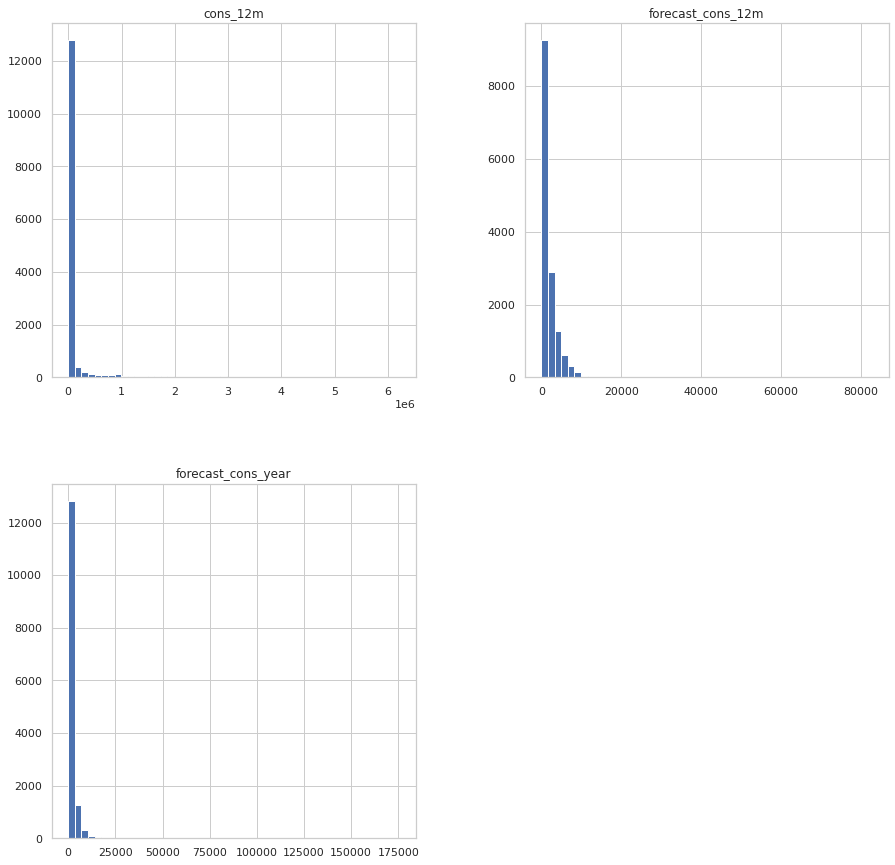

In [ ]:
dataset2[EC_p_f].hist(bins=50, figsize=(15,15));

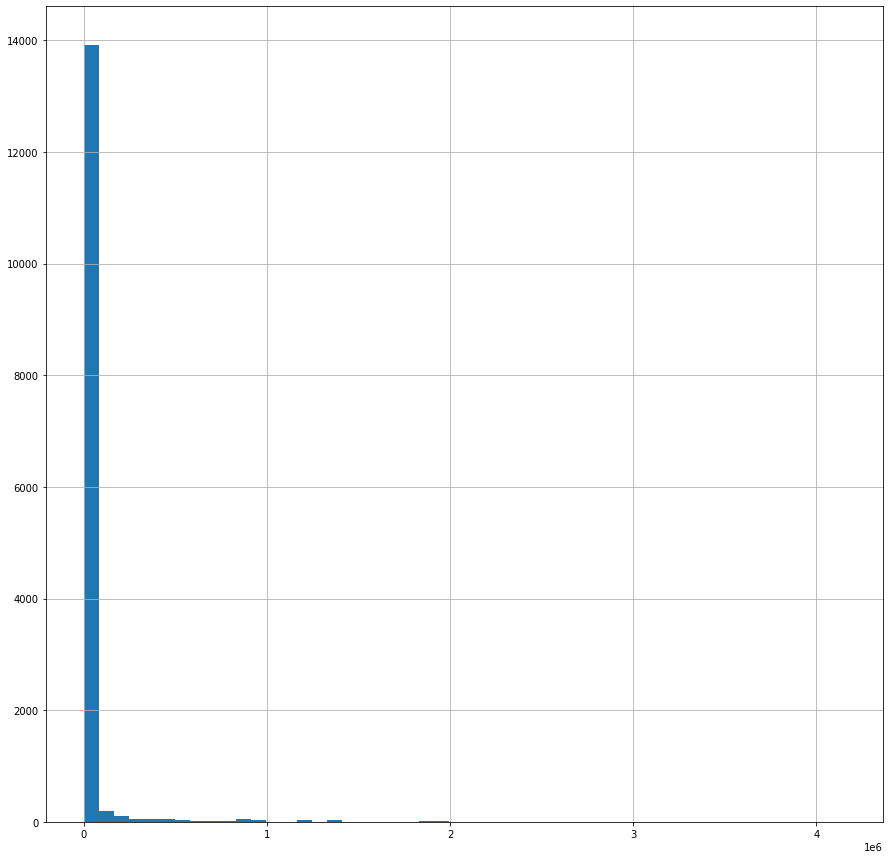

In [10]:
dataset2['cons_gas_12m'].hist(bins=50, figsize=(15,15));

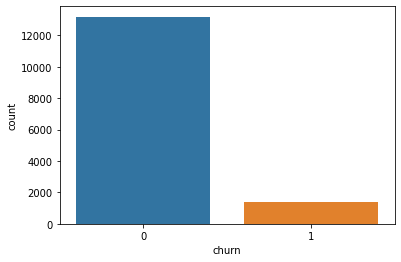

In [11]:
sns.countplot(x ='churn', data = dataset2)


In [12]:
dataset2.has_gas.unique()

array(['t', 'f'], dtype=object)

In [13]:
# Import label encoder
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
dataset2['has_gas']= label_encoder.fit_transform(dataset2['has_gas'])

dataset2['has_gas'].unique()


array([1, 0])

In [14]:
dataset2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  int64  
 12  forecast_meter_rent_12m         

**Feature Engineering**

In [15]:
#removing unwanted column
dataset2 = dataset2.drop(['id','date_activ','date_end','date_modif_prod','date_renewal','origin_up'],axis=1)


In [16]:
# list of numerical variables
numerical_features = [feature for feature in dataset2.columns if dataset2[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

Number of numerical variables:  19


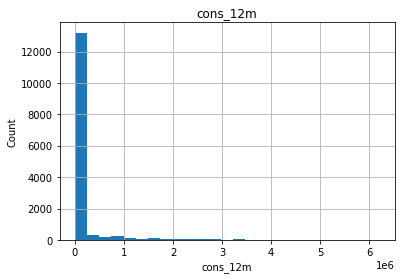

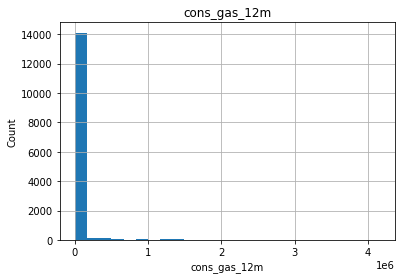

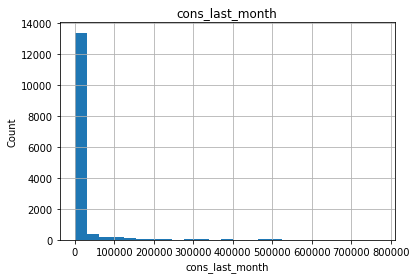

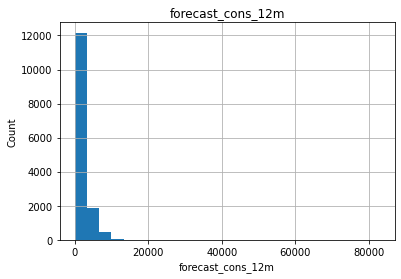

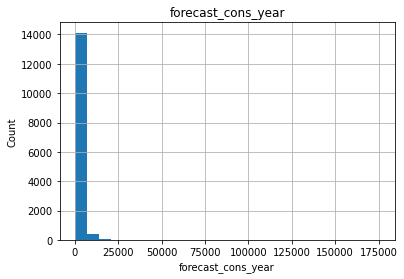

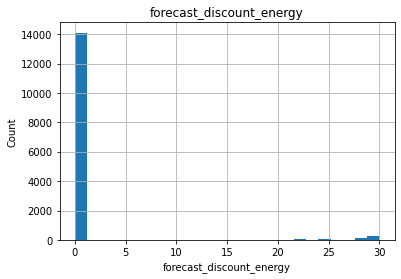

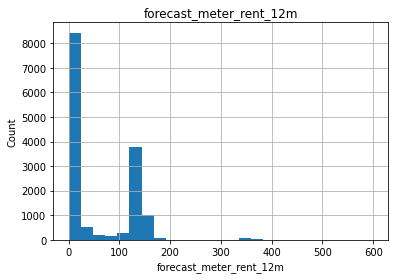

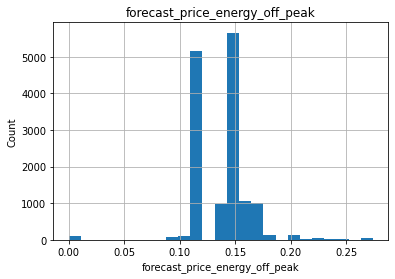

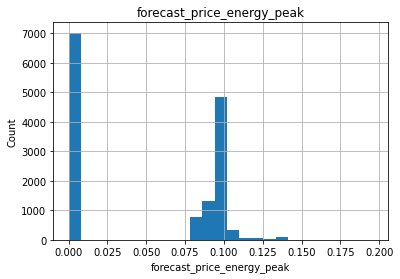

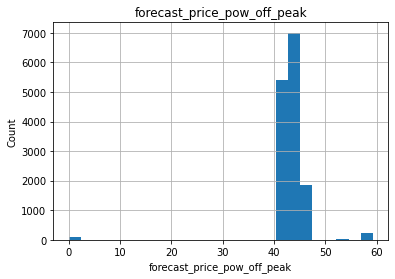

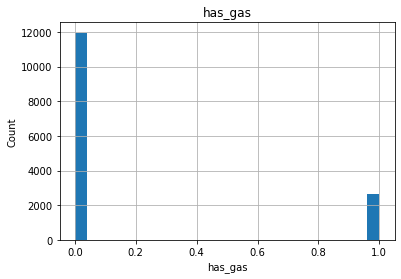

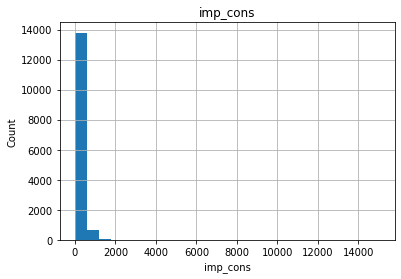

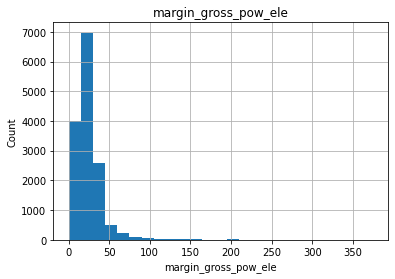

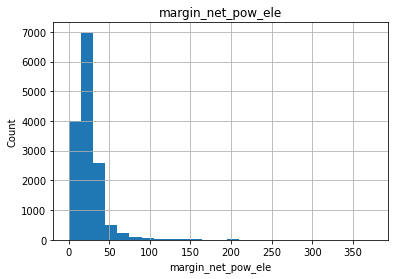

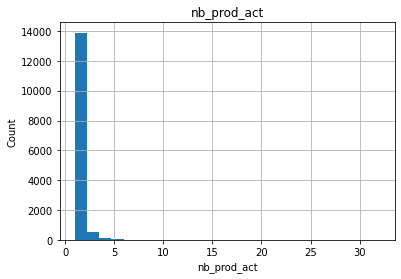

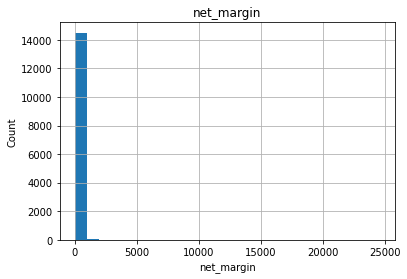

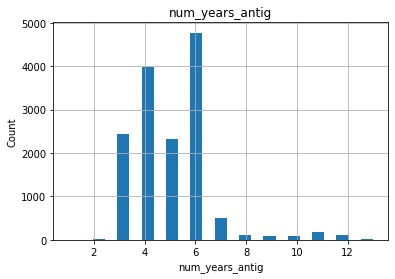

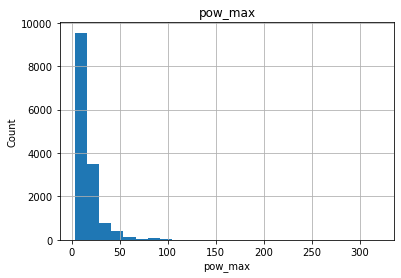

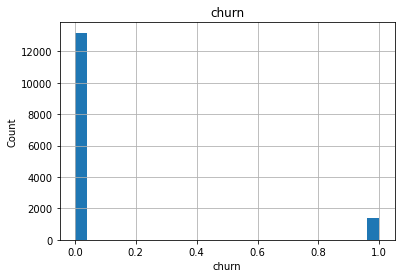

In [17]:
for feature in numerical_features:
    data=dataset2.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

In [ ]:
import plotly.express as px


fig = px.histogram(dataset2, x="forecast_price_energy_off_peak", color = "churn")
fig.show()


In [ ]:
fig = px.histogram(dataset2, x="forecast_price_energy_peak", color = "churn")
fig.show()

In [ ]:
fig = px.histogram(dataset2, x="forecast_price_pow_off_peak", color = "churn")
fig.show()

In [21]:
dataset2.head()

,channel_sales,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
0,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,0.00,0,0,1.78,0.114481,0.098142,40.606701,1,0.00,25.44,25.44,2,678.99,3,43.648,1
1,MISSING,4660,0,0,189.95,0,0,16.27,0.145711,0.000000,44.311378,0,0.00,16.38,16.38,1,18.89,6,13.800,0
2,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,47.96,0,0,38.72,0.165794,0.087899,44.311378,0,0.00,28.60,28.60,1,6.60,6,13.856,0
3,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,240.04,0,0,19.83,0.146694,0.000000,44.311378,0,0.00,30.22,30.22,1,25.46,6,13.200,0
4,MISSING,4425,0,526,445.75,526,0,131.73,0.116900,0.100015,40.606701,0,52.32,44.91,44.91,1,47.98,6,19.800,0


In [22]:
dataset2 = dataset2.drop(['channel_sales'], axis = 1)

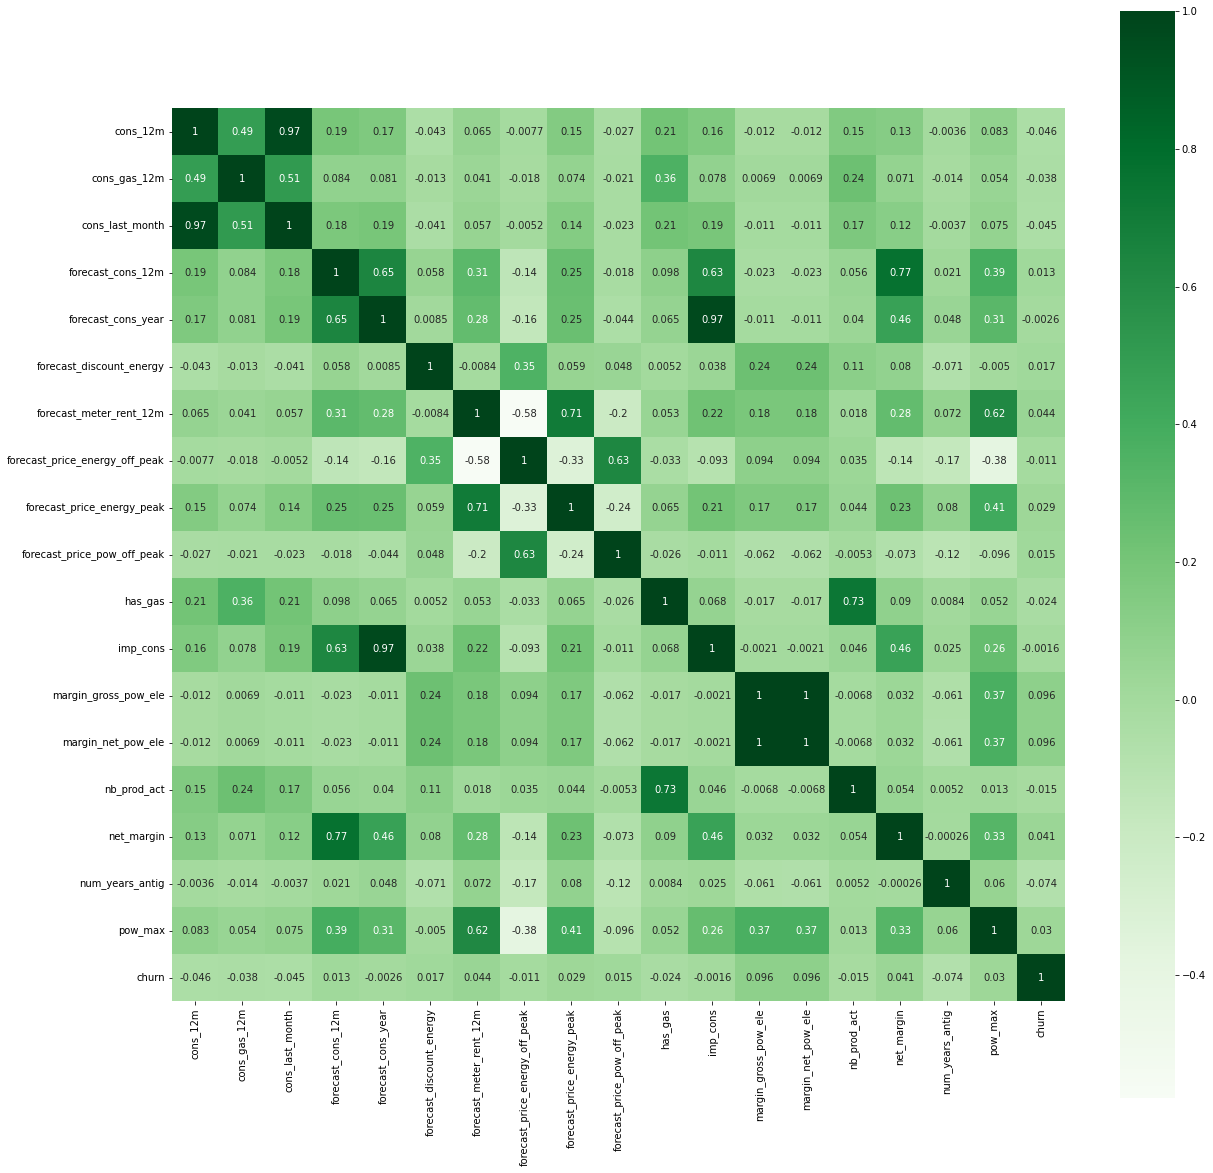

In [35]:
corr_matrix = dataset2.corr()
fig = plt.figure(figsize=(20,20))
sns.heatmap(corr_matrix, annot=True, square=True,cmap = 'Greens');

In [30]:
X = dataset2.drop(['churn'],axis=1)
y = dataset2[['churn']]

In [47]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [48]:
#fitting training data in SMOTE function.
X_smote, y_smote = smote.fit_resample(X.astype('float'),y)

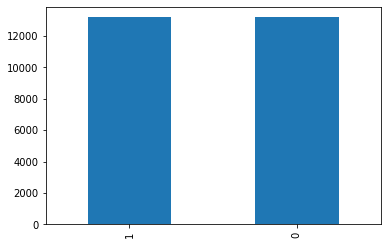

In [49]:
# visualize the target variable
y_smote['churn'].value_counts().plot.bar()

In [50]:
from sklearn.model_selection import train_test_split

In [52]:
#preprocessing data
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size = 0.25, random_state = 0, stratify = y_smote)

**Splitting Train set into train and validation set.**

In [53]:
print(X_train.shape)
print(X_test.shape)

(19780, 18)
(6594, 18)


In [54]:
print(y_train.value_counts())
print()
print(y_test.value_counts())

churn
0        9890
1        9890
dtype: int64

churn
0        3297
1        3297
dtype: int64


**Scaling The Data To Be In Same Range** 

In [55]:
from sklearn.preprocessing import StandardScaler

In [56]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Model Training & Evaluation**

Training the model using different machine learning algorithms and then choosing the best algorithms and optimizing our model.

In [57]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import precision_score,recall_score,accuracy_score,roc_auc_score,roc_curve,confusion_matrix,auc,r2_score,f1_score, classification_report

In [58]:
rfc_model = RandomForestClassifier().fit(X_train, y_train)
y_pred = rfc_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print('-'*50)
print(classification_report(y_test, y_pred))
print('-'*50)
print(f"Random Forest Score : {rfc_model.score(X_test, y_test)}")

[[3207   90]
 [ 257 3040]]
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      3297
           1       0.97      0.92      0.95      3297

    accuracy                           0.95      6594
   macro avg       0.95      0.95      0.95      6594
weighted avg       0.95      0.95      0.95      6594

--------------------------------------------------
Random Forest Score : 0.9473764027904156


In [59]:
gbc_model = GradientBoostingClassifier().fit(X_train, y_train)
y_pred = gbc_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print('-'*50)
print(classification_report(y_test, y_pred))
print('-'*50)
print(f"Gradient Boosting Score : {gbc_model.score(X_test, y_test)}")

[[3242   55]
 [ 668 2629]]
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.83      0.98      0.90      3297
           1       0.98      0.80      0.88      3297

    accuracy                           0.89      6594
   macro avg       0.90      0.89      0.89      6594
weighted avg       0.90      0.89      0.89      6594

--------------------------------------------------
Gradient Boosting Score : 0.8903548680618745


From The Above Models Trained We Can Observe That -

RandomForest Classifier is giving overall f-1 score of 94%.

Gradient Boosting Classifier is giving overall f-1 score of 89%.

So we will consider this both model and hyper parameter tune it to check it on the test dataset.

**Hyperparameter Tuning For Random Forest Classifier**

In [60]:
n_estimators = [5,20,50,100] # number of trees in the random forest
max_features = ['auto', 'sqrt'] # number of features in consideration at every split
max_depth = [int(x) for x in np.linspace(10, 120, num = 12)] # maximum number of levels allowed in each decision tree
min_samples_split = [2, 6, 10] # minimum sample number to split a node
min_samples_leaf = [1, 3, 5] # minimum sample number that can be stored in a leaf node
bootstrap = [True, False] # method used to sample data points


random_grid = {'n_estimators': n_estimators,

'max_features': max_features,

'max_depth': max_depth,

'min_samples_split': min_samples_split,

'min_samples_leaf': min_samples_leaf,

'bootstrap': bootstrap}

In [61]:
from sklearn.model_selection import RandomizedSearchCV
rf_random_cv = RandomizedSearchCV(estimator = RandomForestClassifier(),param_distributions = random_grid, cv = 3, random_state=0, n_jobs = -1)

In [62]:
rf_random_cv.fit(X_train, y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      120],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 3, 5],
                                        'min_samples_split': [2, 6, 10],
                                        'n_estimators': [5, 20, 50, 100]},
                   random_state=0)

In [63]:
print ('Random grid: ', random_grid, '\n')
# print the best parameters
print ('Best Parameters: ', rf_random_cv.best_params_, ' \n')

Random grid:  {'n_estimators': [5, 20, 50, 100], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120], 'min_samples_split': [2, 6, 10], 'min_samples_leaf': [1, 3, 5], 'bootstrap': [True, False]} 

Best Parameters:  {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 3, 'max_features': 'auto', 'max_depth': 80, 'bootstrap': False}  



In [64]:
rfc_best_param_model = RandomForestClassifier(n_estimators = 100, 
                                              min_samples_split = 2, 
                                              min_samples_leaf = 3, 
                                              max_features = 'auto', 
                                              max_depth = 80, 
                                              bootstrap = False  
                                             ).fit(X_train, y_train)

In [65]:
y_pred = rfc_best_param_model.predict(X_test)
print("Test Confusion Matrix ")
print(confusion_matrix(y_test, y_pred))
print('-'*20 + 'Test Report' + '-'*20)
print(classification_report(y_test, y_pred))
print('-'*50)
print(f"Random Forest Test Score : {rfc_best_param_model.score(X_test, y_test)}")

Test Confusion Matrix 
[[3221   76]
 [ 267 3030]]
--------------------Test Report--------------------
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      3297
           1       0.98      0.92      0.95      3297

    accuracy                           0.95      6594
   macro avg       0.95      0.95      0.95      6594
weighted avg       0.95      0.95      0.95      6594

--------------------------------------------------
Random Forest Test Score : 0.9479830148619958


**Plotting ROC For Random Forest Classifi**er

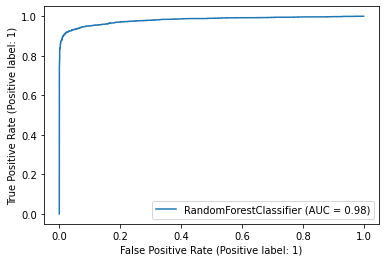

In [66]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(rfc_best_param_model, X_test, y_test)

We can observe that Random Forest Classifier is able to discriminate 98% of the records correctly

**Model Explainability**

In [67]:
pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 8.5 MB/s 


In [68]:
import shap 

In [71]:
shap.initjs()
X_shap = X_test
explainer = shap.TreeExplainer(rfc_best_param_model)
shap_values = explainer(X_shap)

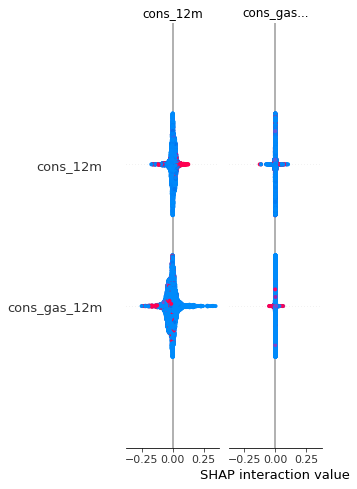

In [72]:
# Obtain a Bar Summary Plot
shap.summary_plot(shap_values, X_shap, plot_type="bar", feature_names = X.columns)